# visualization of data

In [142]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [143]:
ls

ex5.m                    learningCurve.m          submit.m
ex5data1.mat             linearRegCostFunction.m  submitWeb.m
featureNormalize.m       plotFit.m                trainLinearReg.m
fmincg.m                 polyFeatures.m           validationCurve.m


In [144]:
cd mlclass-ex5/

[Errno 2] No such file or directory: 'mlclass-ex5/'
/Users/kanazawa/Dropbox/andrew/mlclass-ex5-007/mlclass-ex5


In [145]:
ls

ex5.m                    learningCurve.m          submit.m
ex5data1.mat             linearRegCostFunction.m  submitWeb.m
featureNormalize.m       plotFit.m                trainLinearReg.m
fmincg.m                 polyFeatures.m           validationCurve.m


In [146]:
from scipy.io import loadmat

In [147]:
data1 = loadmat('ex5data1.mat')

In [148]:
data1.keys()

['ytest',
 'yval',
 '__header__',
 '__globals__',
 'Xtest',
 'Xval',
 'y',
 'X',
 '__version__']

In [149]:
ytest = data1['ytest']
yval = data1['yval']
Xtest = data1['Xtest']
Xval = data1['Xval']
y = data1['y']
X = data1['X']

In [150]:
X.shape, Xval.shape, Xtest.shape

((12, 1), (21, 1), (21, 1))

In [151]:
m,n = X.shape

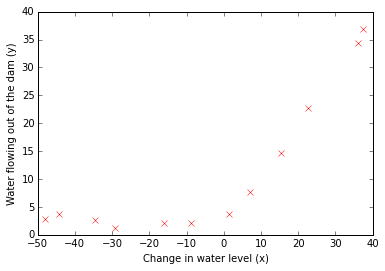

In [152]:
plt.plot(X,y,'rx')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

# cost function and its gradient

In [165]:
# add intercept term
Xp = np.hstack((np.ones((m,1)),X))

In [168]:
from numpy.linalg import norm

In [171]:
def cost(theta,X,y,lam):
    m,n = X.shape
    h = np.dot(X,theta)
    err = h - y.ravel()
    cost = 1./(2.*m) * norm(err)**2.
    reg = lam/(2.*m) * norm(theta[1:])**2.
    return cost + reg

In [186]:
theta = np.ones(2)
cost(theta,Xp,y,1.)

303.99319222026423

In [173]:
def grad(theta,X,y,lam):

    m,n = X.shape
    h = np.dot(X,theta)
    err = h - y.ravel()

    grad = 1./m * np.dot(err,X)    
    reg = lam/m * np.insert(theta[1:],0,0.)
    
    return grad + reg

In [174]:
grad(theta,Xp,y,1.)

array([ -15.30301567,  598.25074417])

# Fitting linear regression

In [175]:
from scipy.optimize import minimize

In [180]:
reg = minimize(cost,theta,args=(Xp,y,0.))

In [181]:
t0,t1 = reg.x

In [182]:
reg

   status: 0
  success: True
     njev: 5
     nfev: 20
 hess_inv: array([[ 1.03142199,  0.00617881],
       [ 0.00617881,  0.001215  ]])
      fun: 22.37390649510901
        x: array([ 13.08790311,   0.36777922])
  message: 'Optimization terminated successfully.'
      jac: array([ -4.76837158e-07,   0.00000000e+00])

In [183]:
u = np.linspace(min(X),max(X))

In [184]:
v = t0 + t1*u

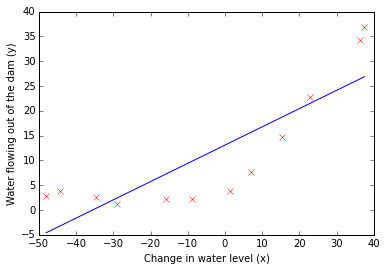

In [185]:
plt.plot(u,v,'b')
plt.plot(X,y,'rx')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

# learning curves

In [48]:
# add intercept term to Xval
mv,nv = Xval.shape
Xvalp = np.hstack((np.ones((mv,1)),Xval))

In [49]:
def learningCurve(X,y,Xval,yval,lam):

    m,n = X.shape
    a = np.zeros((m,3))
    theta_tmp = np.zeros(n)
    
    for i in range(1,m+1):

        reg_tmp = minimize(cost,theta_tmp,args=(X[0:i,],y[0:i],lam))
        theta_tmp = reg_tmp.x

        J_train = cost(theta_tmp,X[0:i,],y[0:i],0.)
        J_val = cost(theta_tmp,Xval,yval,0.)
 
        a[i-1,0], a[i-1,1], a[i-1,2] = i, J_train, J_val
        
    return a    

In [50]:
a = learningCurve(Xp,y,Xvalp,yval,0.)

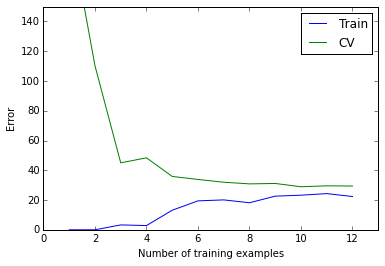

In [53]:
plt.plot(a[:,0],a[:,1],'b')
plt.plot(a[:,0],a[:,2],'g')
plt.axis([0,13,0,150])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(['Train','CV'])

# polynomial regression

## optimization

In [54]:
# feature scaling
def featureNormalize(X,mu,sig):
    X_s = (X - mu)/sig
    return X_s

# perform feature scaling and add intercept term
def getXp(X,p,mu,sig):
    m,n = X.shape
    Xp = np.hstack((np.ones((m,1)),featureNormalize(X,mu,sig)))
    return Xp

In [55]:
# return polynomial (work without intercept term)
def X_poly(X,p):
    X_poly = X**(np.arange(1,p+1))    
    return X_poly

In [57]:
# perform optimization
def getTheta(X,y,p,lam):
    
#    m,n = X.shape
    
    theta_p_ini = np.zeros(p+1)    
    reg_p = minimize(cost,theta_p_ini,args=(X,y,lam))
    
    return reg_p.x

In [59]:
# make polynomial
p = 8
X_p = X_poly(X,p)  
Xval_p = X_poly(Xval,p)

# feature scaling variables
mu = np.mean(X_p,0)  
sig = np.std(X_p,0)
    
# perform feature scaling and add intercept term
Xp_p = getXp(X_p,p,mu,sig) 
Xvalp_p = getXp(Xval_p,p,mu,sig)

In [60]:
Xp_p.shape, Xvalp_p.shape

((12, 9), (21, 9))

In [209]:
p = 8
lam = 0.
theta_8 = getTheta(Xp_p[:,],y[:],p,lam)

In [215]:
Xp_p[:,].shape, y[:].shape

((12, 9), (12, 1))

In [62]:
theta_8

array([ 11.21758878,   9.11790279,  18.15678223,  29.05672318,
       -27.10893458, -74.81309035,   6.46072748,  60.96734288,  20.8924132 ])

In [63]:
cost(theta_8,Xp_p,y,0.)

0.028891832535703071

## plot 

In [64]:
u = np.linspace(-60,60)

In [67]:
p = 8
u_8 = X_poly(u.reshape(50,1),p)
up_8 = np.hstack((np.ones((50,1)),featureNormalize(u_8,mu,sig))) # use mu and sig of X_p
v = np.dot(up_8,theta_8) # prediction of the model

[-80, 80, -40, 80]

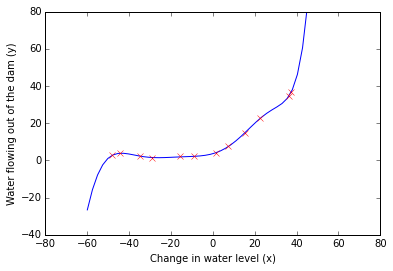

In [70]:
plt.plot(u,v)
plt.plot(X,y,'rx')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.axis([-80,80,-40,80])

## learning curve

In [76]:
lc8 = learningCurve(Xp_p,y,Xvalp_p,yval,0.)

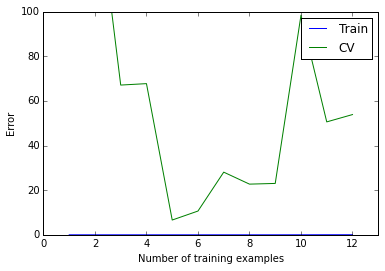

In [77]:
plt.plot(lc8[:,0],lc8[:,1],'b')
plt.plot(lc8[:,0],lc8[:,2],'g')
plt.axis([0,13,0,100])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(['Train','CV'])

The above result is slightly different from the one with Octave. 

Nevertheless, if my code is correct, it turns out that choosing p=8 without regularization gives us a high-variance result:

While the training set is well reproduced, the model fails to describe the CV set.

# try different values of lambda

In [78]:
# try lam = 1 and 100
p = 8
theta_8_lam1 = getTheta(Xp_p,y,p,1.)
theta_8_lam100 = getTheta(Xp_p,y,p,100.)

In [80]:
v_lam1 = np.dot(up_8,theta_8_lam1)
v_lam100 = np.dot(up_8,theta_8_lam100)

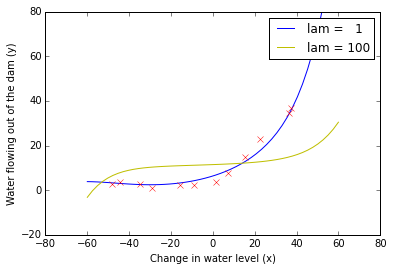

In [82]:
plt.plot(u,v_lam1,'b')
plt.plot(u,v_lam100,'y')

plt.plot(X,y,'rx')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.axis([-80,80,-20,80])

plt.legend(['lam =   1', 'lam = 100'])

## learning curve for lam = 1

In [83]:
lc8_1 = learningCurve(Xp_p,y,Xvalp_p,yval,1.)

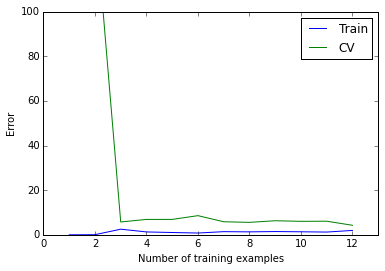

In [84]:
plt.plot(lc8_1[:,0],lc8_1[:,1],'b')
plt.plot(lc8_1[:,0],lc8_1[:,2],'g')

plt.axis([0,13,0,100])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(['Train','CV'])

# Select lambda using CV set

In [191]:
getTheta(Xp_p,y,p,1.)


array([ 11.21758982,   8.36726072,   5.10199258,   3.39009395,
         2.15885777,   1.62045338,   0.97246535,   1.02575957,   0.3226377 ])

In [192]:
lam_a = np.array([0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10])


In [193]:
c = np.zeros((len(lam_a),3))
i = 0
for lam in lam_a:

    theta_tmp = getTheta(Xp_p,y,p,lam)
    J_train = cost(theta_tmp,Xp_p,y,0.)
    J_val = cost(theta_tmp,Xvalp_p,yval,0.)

    c[i,0], c[i,1], c[i,2] = lam, J_train, J_val
    i += 1
    
    
    
    

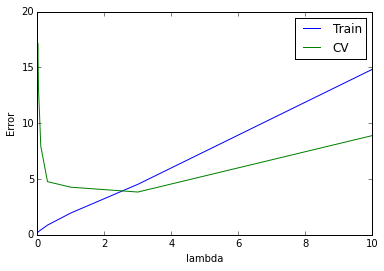

In [194]:
plt.plot(c[:,0],c[:,1])
plt.plot(c[:,0],c[:,2])
plt.xlabel('lambda')
plt.ylabel('Error')
plt.axis([0,10,0,20])
plt.legend(['Train', 'CV'])

We find the best value of lambda is around 3.

# K-fold

In [197]:
from sklearn.cross_validation import KFold

In [251]:
from sklearn.metrics import mean_squared_error

In [261]:
k = 3
kf = KFold(m, k, shuffle=True)
p = 8


for lam in lam_a:
    
    score_a = []
    score_b = []
    
    for train_idx, test_idx in kf:
    
        Xp_p_train, y_train = Xp_p[train_idx], y[train_idx]
        Xp_p_test, y_test = Xp_p[test_idx], y[test_idx]

        theta_8 = getTheta(Xp_p, y, p, lam)
        
        u_8 = X_poly(u.reshape(50,1),p)
        up_8 = np.hstack((np.ones((50,1)),featureNormalize(u_8,mu,sig))) # use mu and sig of X_p
        v = np.dot(up_8,theta_8) # prediction of the model

        J_val = 0.5 * mean_squared_error(np.dot(Xvalp_p,theta_8), yval)
#        J_val = cost(theta_8, Xvalp_p, yval, 0.)
#        J_train = cost(theta_8,Xp_p,y,0.)
        J_train = 0.5 * mean_squared_error(np.dot(Xp_p,theta_8), y)

        score_a.append(J_val)
        score_b.append(J_train)
        
#        print score_a
    print lam, np.mean(score_a), np.mean(score_b)

0.0 54.3656899989 0.0288918056731
0.001 9.35712158394 0.107980885868
0.003 15.9224337543 0.166791809142
0.01 17.1490020987 0.217952160861
0.03 13.2136216772 0.275151272744
0.1 7.92649181633 0.438664293131
0.3 4.7608273716 0.868167189185
1.0 4.26335388919 1.95868830472
3.0 3.83218043732 4.52509710546
10.0 8.88969328735 14.8257832131
